In [1]:
import mne
import numpy as np
import math as m
import matplotlib.pyplot as plt

In [2]:
def azim_proj(pos):
    """
    Computes the Azimuthal Equidistant Projection of input point in 3D Cartesian Coordinates.
    Imagine a plane being placed against (tangent to) a globe. If
    a light source inside the globe projects the graticule onto
    the plane the result would be a planar, or azimuthal, map
    projection.
    :param pos: position in 3D Cartesian coordinates
    :return: projected coordinates using Azimuthal Equidistant Projection
    """
    [r, elev, az] = cart2sph(pos[0], pos[1], pos[2])
    return pol2cart(az, m.pi / 2 - elev)


def cart2sph(x, y, z):
    """
    Transform Cartesian coordinates to spherical
    :param x: X coordinate
    :param y: Y coordinate
    :param z: Z coordinate
    :return: radius, elevation, azimuth
    """
    x2_y2 = x**2 + y**2
    r = m.sqrt(x2_y2 + z**2)  # r
    elev = m.atan2(z, m.sqrt(x2_y2))  # Elevation
    az = m.atan2(y, x)  # Azimuth
    return r, elev, az


def pol2cart(theta, rho):
    """
    Transform polar coordinates to Cartesian
    :param theta: angle value
    :param rho: radius value
    :return: X, Y
    """
    return rho * m.cos(theta), rho * m.sin(theta)

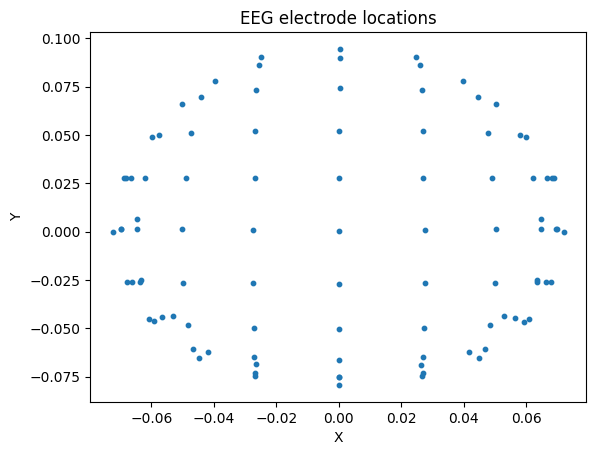

In [3]:
montage_path = "/data1/share_data/CVPR2021-02785/biosemi96.sfp"
montage = mne.channels.read_custom_montage(montage_path)
coords = montage.get_positions()["ch_pos"]
coords = np.array(list(coords.values()))
coords = coords[3:]
# write to file
np.savetxt("locs_3d.csv", coords, delimiter=",")
# draw cooridnates
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(coords[:, 0], coords[:, 1], s=10)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('EEG electrode locations')
plt.show()


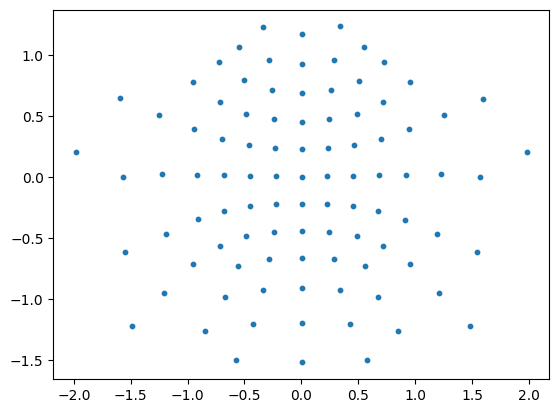

In [5]:
coords_2d = np.apply_along_axis(azim_proj, 1, coords)
np.savetxt("locs_2d.csv", coords_2d, delimiter=",")
# draw the 2D projection of the electrode locations
plt.scatter(coords_2d[:,0], coords_2d[:,1], s=10)
plt.show()